VITAL DB to wave 

In [1]:
import os
import glob
import datetime
import numpy as np
import AMCVitalReader as vr
import matplotlib.pyplot as plt
import scipy.misc
import SimpleITK as sitk
import math
from scipy.io import wavfile
from pylab import *
from PIL import Image
from numpy import zeros, newaxis
from scipy.fftpack import fft
#from skimage import io

In [2]:
############################################################################################################
############################################################################################################
#  1.input file name
fname = 'F-07_180502_145342_normal'
############################################################################################################
############################################################################################################

vr_data = vr.vital_reader(fname+'.vital')
vr_data.read_header()
vr_data.read_packets()

a,b = vr_data.read_number_datetime('Intellivue','HR')
print("[time start]",a[0])
print("[time end]",a[-1])
print("[time length]",a[-1]-a[0])

[time start] 2018-05-02 15:02:15.526000
[time end] 2018-05-02 17:40:33.951000
[time length] 2:38:18.425000


In [3]:
############################################################################################################
############################################################################################################
#  2.select specific time     # Recommended duration : 1 min before & 1 min after 
event_label = 'test'           
# Event label #OLV = one lung ventilation 
              #TLV = two lung ventilation 

start_year   = 2018 #
start_month  = 5    #
start_date   = 2    #
start_hour   = 15
start_minute = 15
start_second = 0
end_hour   = 15
end_minute = 20
end_second = 30
############################################################################################################
############################################################################################################

In [4]:
############################################################################################################
############################################################################################################
#  3.get specific signals
# Intellivue
device1_signal = ['ECG_HR',
                  'PLETH_HR',
                  'AWAY_CO2_INSP_MIN',
                  'O2_ET_PERC',
                  'O2_INSP_PERC',
                  'N2O_ET',
                  'N2O_INSP',
                  'RR']

# Primus
device2_signal = ['CO2']
############################################################################################################
############################################################################################################

end_year     = start_year   
end_month    = start_month
end_date     = start_date
fname_with_time = fname+'_'+event_label+'_'+str(start_hour)+':'+str(start_minute)+':'+str(start_second)+'to'+str(end_hour)+':'+str(end_minute)+':'+str(end_second)

print('[fname_with_time]',fname_with_time)
print('[device1_signal]',len(device1_signal))
print('[device2_signal]',len(device2_signal))



# ############################################################################################################
# ############################################################################################################
# #  3.get specific signals
# # Intellivue
# device1_signal = ['PLETH_SAT_O2',
#                   'AWAY_CO2_ET',
#                   'AWAY_CO2_INSP_MIN',
#                   'O2_ET_PERC',
#                   'O2_INSP_PERC',
#                   'N2O_ET',
#                   'N2O_INSP',
#                   'RR']

# # Primus
# device2_signal = ['SET_TV_L',
#                   'SET_INTER_PEEP',  # 'SET_PEEP'
#                   'VENT_LEAK',
#                   'SET_FIO2',
#                   'SET_FRESH_FLOW',
#                   'MAWP_MBAR',
#                   'MAC',
#                   'MV',
#                   'INCO2',
#                   'ETCO2',
#                   'FIN2O',
#                   'FEN2O',
#                   'FEO2',
#                   'FIO2',
#                   'PIP_MBAR',
#                   'TV',
#                   'COMPLIANCE',
#                   'PEEP_MBAR',
#                   'RR_CO2',
#                   'CO2',
#                   'AWP',
#                   'EXP_DES', 
#                   'SET_INSP_TM',
#                   'SET_RR_IPPV',
#                   'SET_PIP',
#                   'SET_INSP_PAUSE']
# ############################################################################################################
# ############################################################################################################

# end_year     = start_year   
# end_month    = start_month
# end_date     = start_date
# fname_with_time = fname+'_'+event_label+'_'+str(start_hour)+':'+str(start_minute)+':'+str(start_second)+'to'+str(end_hour)+':'+str(end_minute)+':'+str(end_second)

# print('[fname_with_time]',fname_with_time)
# print('[device1_signal]',len(device1_signal))
# print('[device2_signal]',len(device2_signal))

[fname_with_time] F-07_180502_145342_normal_test_15:15:0to15:20:30
[device1_signal] 8
[device2_signal] 1


In [5]:
# #draw all wave data  
# x = vr_data.read_wave_datetime_interval('DI-1120', 'VOLT',a[0],a[-1])
# plt.figure(figsize=(10,10),dpi=350)
# plt.plot(x[0],x[1])
# plt.xlabel('time')
# plt.ylabel('voltage')
# plt.show()

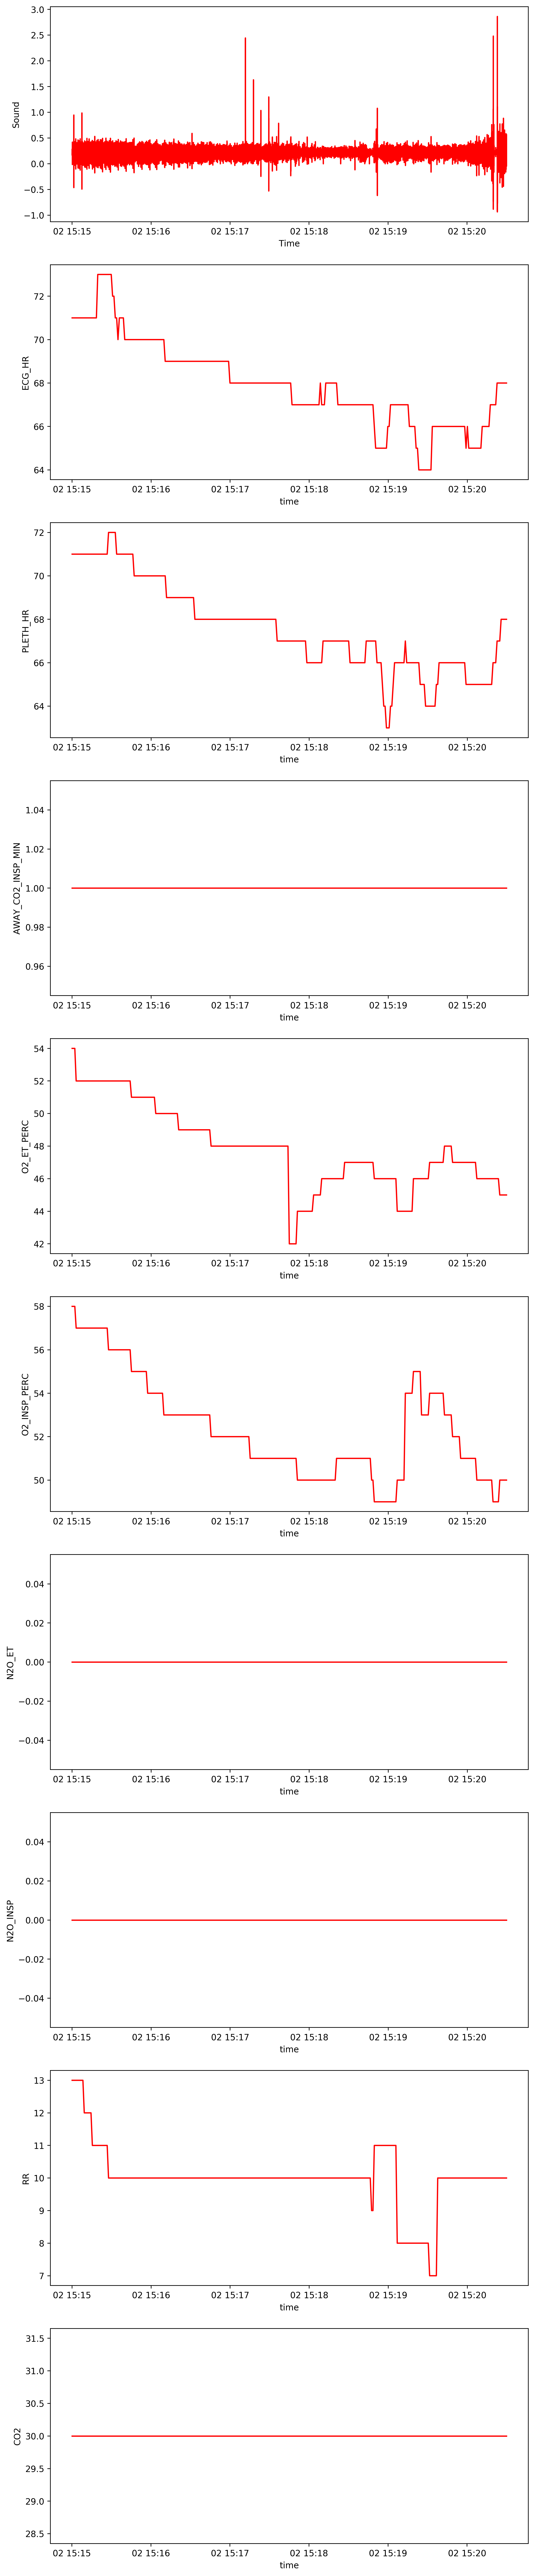

In [9]:
# selected wave data
x = vr_data.read_wave_datetime_interval('DI-1120', 'VOLT',datetime.datetime(start_year,start_month,start_date,start_hour,start_minute,start_second),datetime.datetime(end_year,end_month,end_date,end_hour,end_minute,end_second))

# signal data extract
plt.figure(figsize=(10,60),dpi=350)

subplot(len(device1_signal)+len(device2_signal)+2,1,1)
plt.plot(x[0],x[1],'r')
plt.xlabel('Time')
plt.ylabel('Sound')

for i in range(0,len(device1_signal)+len(device2_signal)):
    if i<len(device1_signal):
        temp = vr_data.read_number_datetime_interval('Intellivue',device1_signal[i],datetime.datetime(start_year,start_month,start_date,start_hour,start_minute,start_second),datetime.datetime(end_year,end_month,end_date,end_hour,end_minute,end_second))
    else:
        temp = vr_data.read_number_datetime_interval('Primus',device2_signal[i-len(device1_signal)],datetime.datetime(start_year,start_month,start_date,start_hour,start_minute,start_second),datetime.datetime(end_year,end_month,end_date,end_hour,end_minute,end_second))
#     print(i)
              
    subplot(len(device1_signal)+len(device2_signal)+2,1,i+2)
    plt.plot(temp[0],temp[1],'r')
    plt.xlabel('time')
    if i<len(device1_signal):
        plt.ylabel(device1_signal[i])
    else:
        plt.ylabel(device2_signal[i-len(device1_signal)])
        
if not os.path.exists('output'):
    os.makedirs('output')        
if not os.path.exists('output/'+fname):
    os.makedirs('output/'+fname)
if not os.path.exists('output/'+fname+'/'+fname_with_time):
    os.makedirs('output/'+fname+'/'+fname_with_time)
    
savefig('output/'+fname+'/'+fname_with_time+'/'+fname_with_time+'_signals.png',bbox_inches='tight')
# savefig('output/'+fname+'/'+fname+'_'+event_label+'_'+str(start_hour)+':'+str(start_minute)+':'+str(start_second)+'to'+str(end_hour)+':'+str(end_minute)+':'+str(end_second)+'_signals.png',bbox_inches='tight')

plt.show()

# save wave data .wav
x0 = np.array(x[1]).astype(np.float64)
# x0 = np.array(x[1])
wavfile.write('output/'+fname+'/'+fname_with_time+'/'+fname_with_time+'.wav',2500,x0)

/home/keewon/.local/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


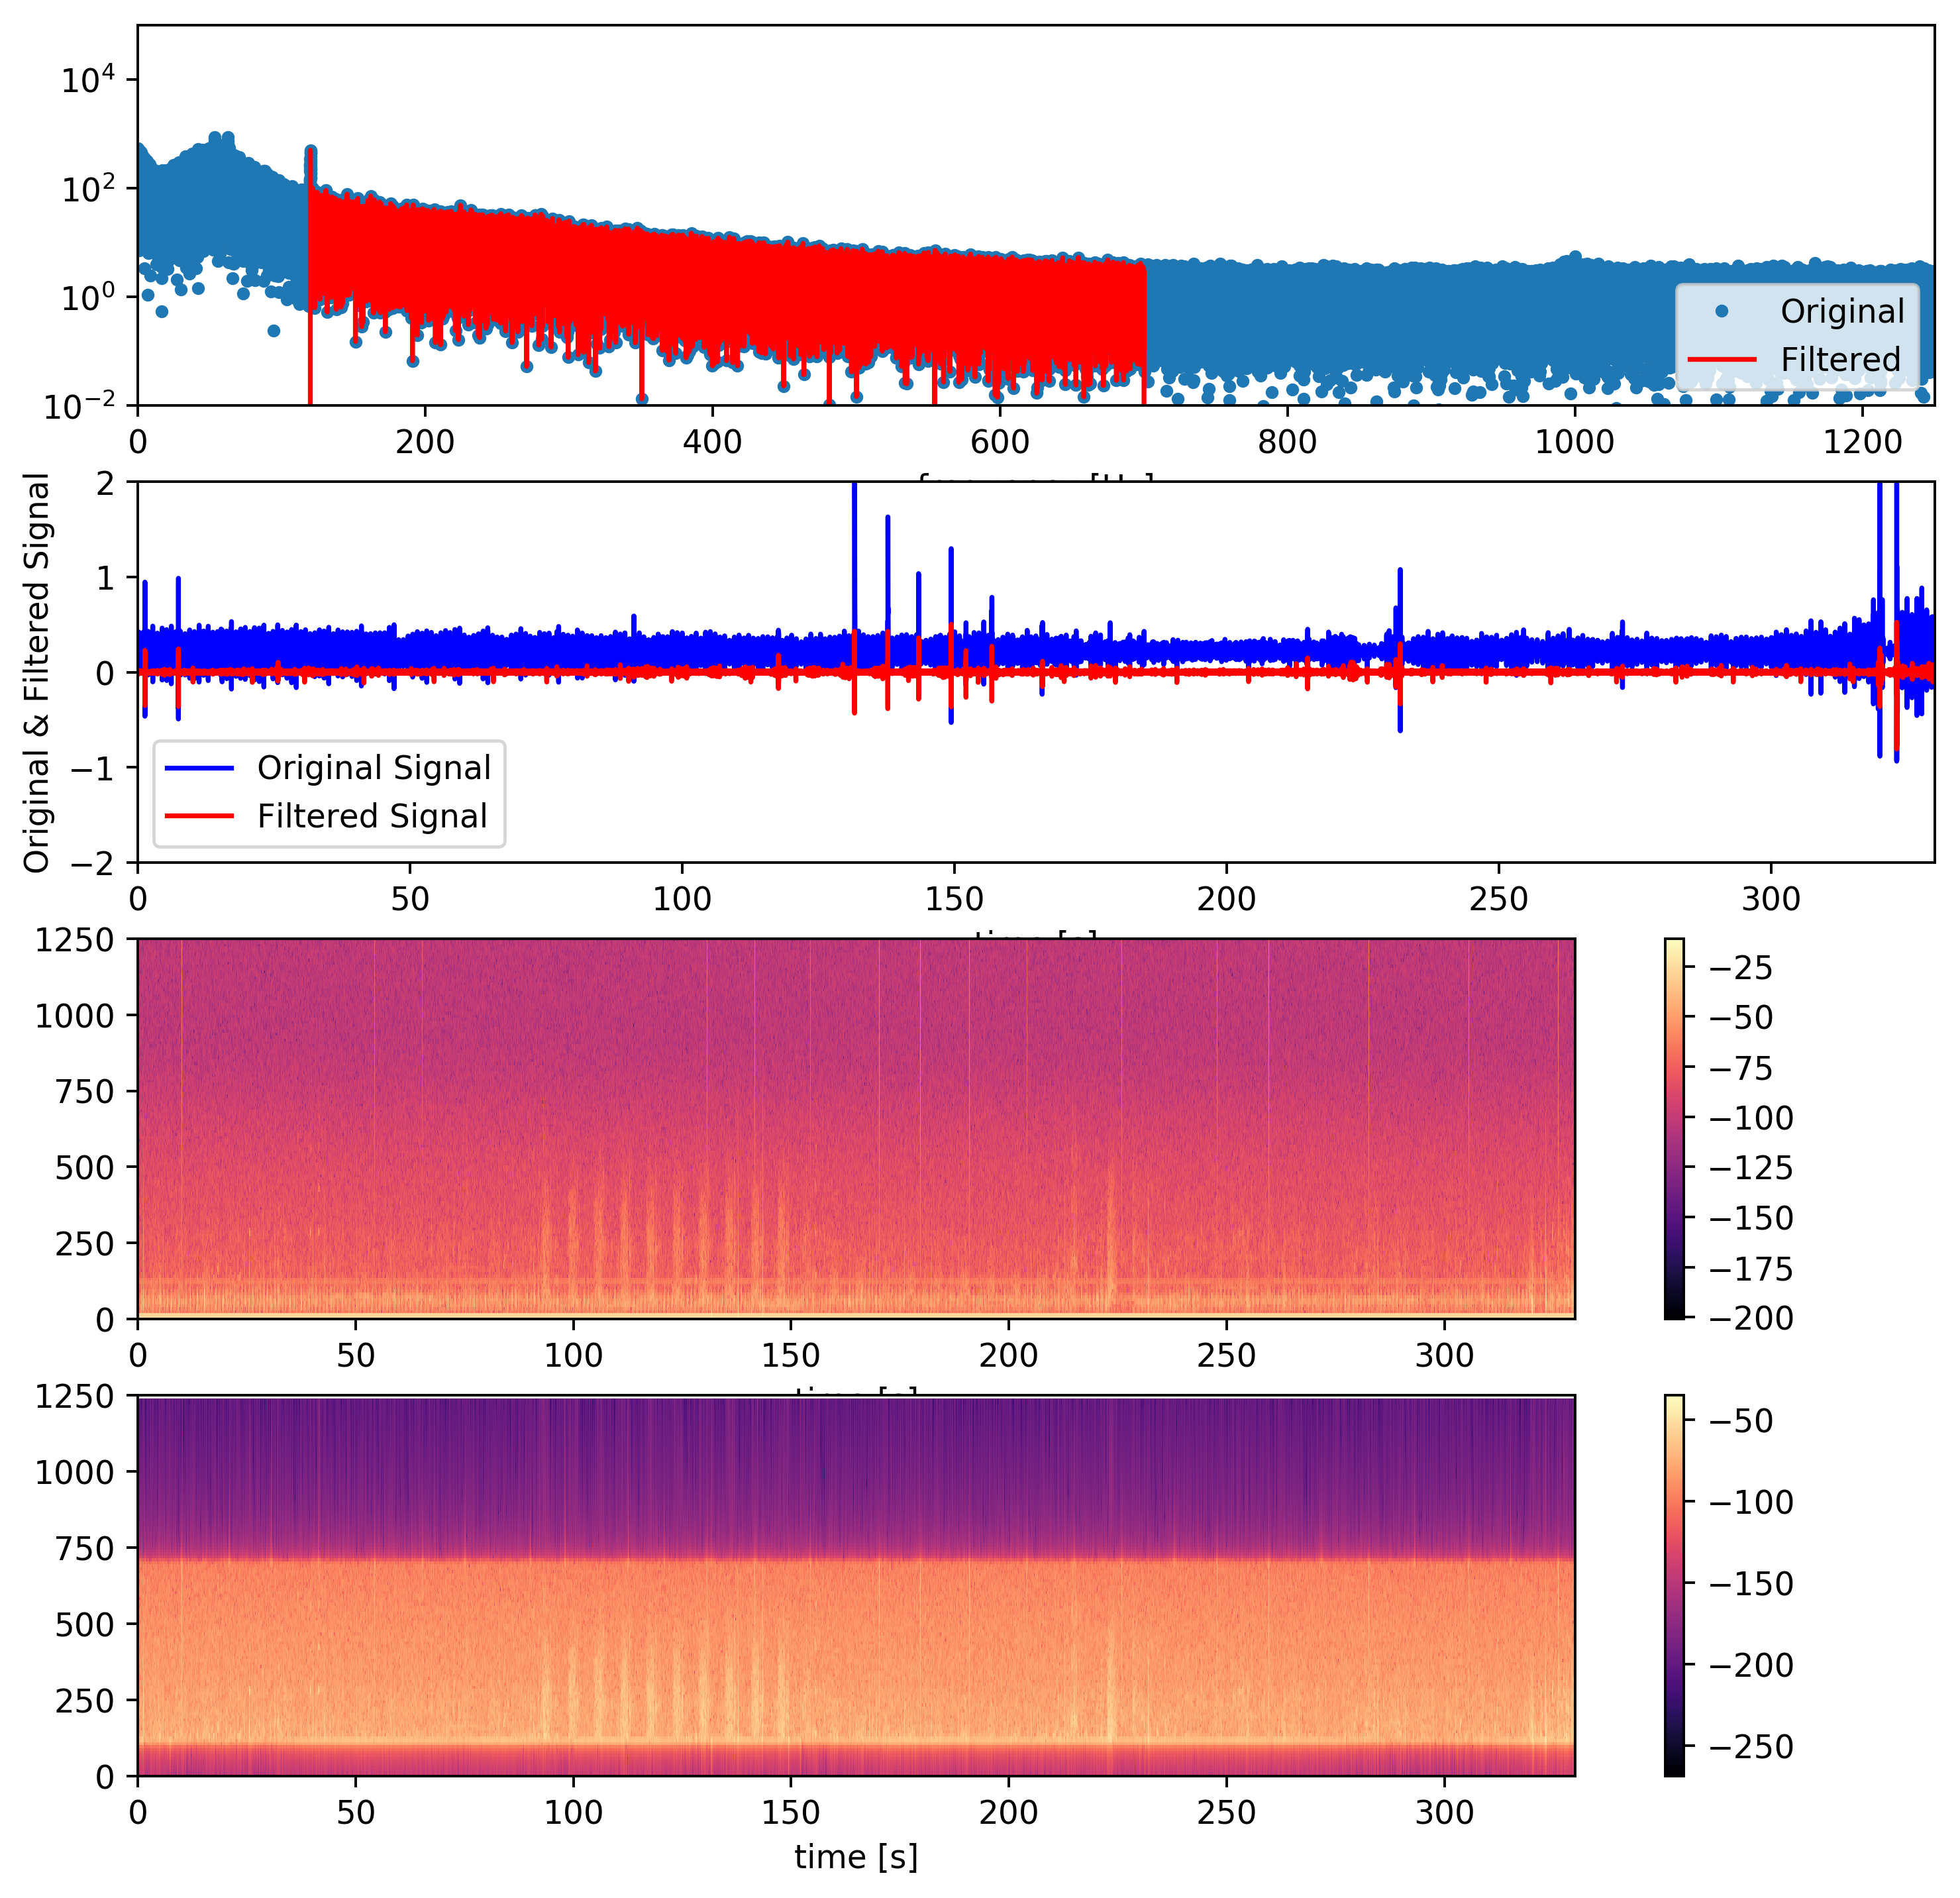

[s] [0.1861686  0.18494782 0.18372704 ... 0.28016847 0.27284381 0.26551914]
[s_filtered] [-0.01532956-8.50498123e-19j -0.02648588-2.13022865e-17j
 -0.01167035-9.35655593e-18j ...  0.02014764+1.82633635e-16j
  0.03219459+2.69639168e-16j  0.01671081+1.54333652e-16j]


In [20]:
######################################################
# band setting
band_high = 700   #2500
band_low  = 120     #50
index = 0
######################################################

cut_freq_h = band_high+index
cut_freq_l = band_low+index

######################################################
## on construction
output_length  = 3    # sec
output_overlay = 50   # 50%
######################################################

fs, data = wavfile.read('output/'+fname+'/'+fname_with_time+'/'+fname_with_time+'.wav')

def filter_rule(x, freq):
    if abs(freq)>cut_freq_h or abs(freq)<cut_freq_l:
        return 0
    else:
        return x

num_samples = len(data)
dt = 1/fs
s = data.T
s_time = [k*dt for k in range(0,num_samples)]

# print("num_samples",num_samples)
# print("dt",dt)
# print("s",s)
# print(dt*num_samples)
# print("s_time",s_time)

F = fft(s)
f = fftfreq(len(F),dt)
    
F_filtered = array([filter_rule(x,freq) for x,freq in zip(F,f)])
# print("F_filtered",F_filtered)
#s_filtered = ifft(F_filtered)
s_filtered = ifft(F_filtered)
# print("s_filtered",s_filtered)

plt.figure(figsize=(10,10),dpi=350)
subplot(4,1,1)
plt.semilogy(f,abs(F),'.')
plt.semilogy(f,abs(F_filtered),'r')
plt.legend(['Original','Filtered',],loc=4)
plt.axis([0,1250,0.01,100000])
plt.xlabel('frequency [Hz]')
 
subplot(4,1,2)
plt.ylabel('Original & Filtered Signal')
plt.plot(s_time,s,'b')
plt.plot(s_time,s_filtered,'r')
plt.legend(['Original Signal','Filtered Signal'])
plt.axis([0,dt*num_samples,-2,2])
plt.xlabel('time [s]')

subplot(4,1,3)
plt.specgram(s, NFFT=256,Fs=fs,cmap='magma',scale='dB')
plt.colorbar()
plt.xlabel('time [s]')
plt.ylim(0,1250)

subplot(4,1,4)
plt.specgram(s_filtered, NFFT=256,Fs=fs,cmap='magma',scale='dB')
plt.colorbar()
plt.xlabel('time [s]')
plt.ylim(0,1250)

# # 수정중
# subplot(3,1,3)
# plt.periodogram(s,NFFT=256,Fs=fs)
# plt.axis([0,dt*num_samples,0,1250])
# plt.xlabel('time [s]')

savefig('output/'+fname+'/'+fname_with_time+'/'+fname_with_time+'_'+str(band_low)+'_'+str(band_high)+'_fft.png',bbox_inches='tight')

plt.show()

print('[s]',s)
print('[s_filtered]',s_filtered)



# filtered wave file
# x0 = np.array(s_filtered.real).astype(np.float32)
x0 = np.array(s_filtered.real).astype(np.float64)
wavfile.write('output/'+fname+'/'+fname_with_time+'/'+fname_with_time+'_'+str(band_low)+'_'+str(band_high)+'.wav',2500,x0)
wavfile.write('output/'+fname+'/'+fname_with_time+'/'+fname_with_time+'_'+str(band_low)+'_'+str(band_high)+'_amplified X7.wav',2500,x0*7)

Done!

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt



f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


# print('[s_time]',len(s_time),s_time)
print('[F]',len(F),F)
print('[s]',len(s),s)

f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, s)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# 모자란 점 int16 구현..
# pcolormesh 구현
# 필터 조절
# 등등
